### Importación de datos



In [16]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [17]:
#  Calcular el ingreso total de cada tienda
def ingreso_total(nro_tienda,tienda):
  facturacion_total = tienda['Precio'].sum()
  print(f"El ingreso de la tienda {nro_tienda} es: ${facturacion_total}")

In [18]:
ingreso_total(1,tienda)
ingreso_total(2,tienda2)
ingreso_total(3,tienda3)
ingreso_total(4,tienda4)

El ingreso de la tienda 1 es: $1150880400.0
El ingreso de la tienda 2 es: $1116343500.0
El ingreso de la tienda 3 es: $1098019600.0
El ingreso de la tienda 4 es: $1038375700.0


## Grafico del análisis de facturación



In [19]:
# Preparacion de los datos para el grafico
tienda_1 = tienda['Precio'].sum()
tienda_2 = tienda2['Precio'].sum()
tienda_3 = tienda3['Precio'].sum()
tienda_4 = tienda4['Precio'].sum()

ingreos_tiendas = [tienda_1, tienda_2, tienda_3, tienda_4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

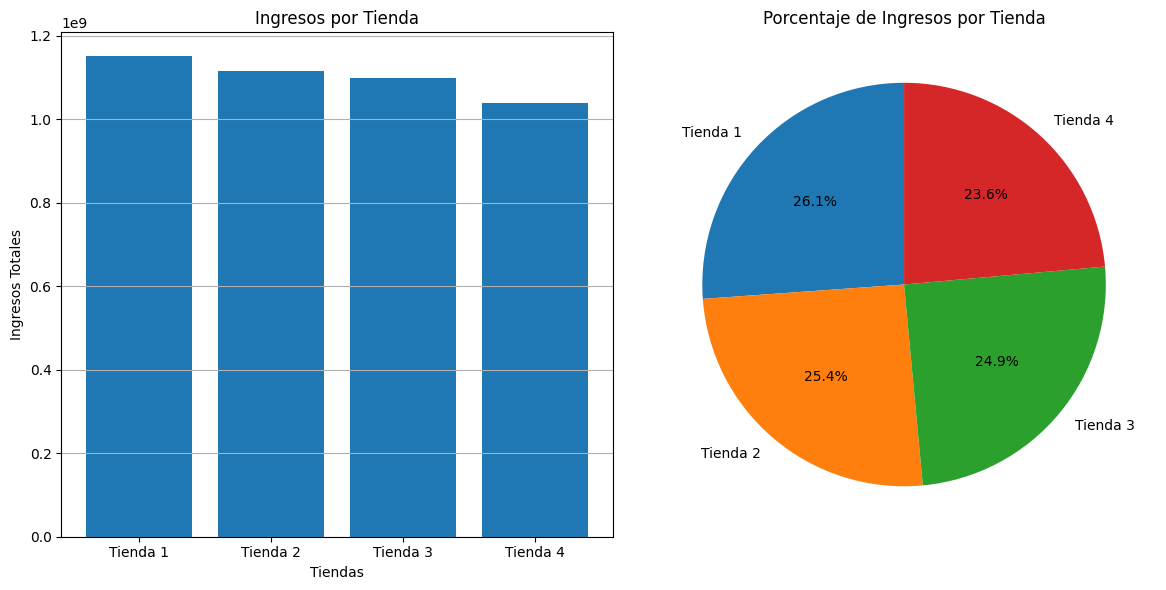

In [20]:
# Generar Grafico
# Crear figura con 1 fila y 2 columnas
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# --- Subgráfico 1 ---
ax[0].bar(nombres_tiendas, ingreos_tiendas)
ax[0].set_xlabel('Tiendas')
ax[0].set_ylabel('Ingresos Totales')
ax[0].set_title('Ingresos por Tienda')
ax[0].grid(axis='y')

# --- Subgráfico 2 ---
ax[1].pie(ingreos_tiendas, labels=nombres_tiendas, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Porcentaje de Ingresos por Tienda')

# --- Ajustar espacio ---
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [21]:
# Agrupar las tiendas en una lista unica
tiendas = [tienda,tienda2,tienda3,tienda4]

In [22]:
# Calcular la cantidad de productos vendidos por categoría en cada tienda
for inx, tienda in enumerate(tiendas, start=1):
  venta_por_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
  print(f"Ventas por categoria de Tienda {inx} ----------- \n {venta_por_categoria}")

Ventas por categoria de Tienda 1 ----------- 
 Categoría del Producto
Electrónicos               429493500.0
Electrodomésticos          363685200.0
Muebles                    187633700.0
Instrumentos musicales      91299000.0
Deportes y diversión        39290000.0
Juguetes                    17995700.0
Artículos para el hogar     12698400.0
Libros                       8784900.0
Name: Precio, dtype: float64
Ventas por categoria de Tienda 2 ----------- 
 Categoría del Producto
Electrónicos               410831100.0
Electrodomésticos          348567800.0
Muebles                    176426300.0
Instrumentos musicales     104990300.0
Deportes y diversión        34744500.0
Juguetes                    15945400.0
Artículos para el hogar     14746900.0
Libros                      10091200.0
Name: Precio, dtype: float64
Ventas por categoria de Tienda 3 ----------- 
 Categoría del Producto
Electrónicos               410775800.0
Electrodomésticos          329237900.0
Muebles                    201

# 3. Calificación promedio de la tienda


In [23]:
# Calcular las calificaciones promedio de los clientes para cada tienda
for inx, tienda in enumerate(tiendas, start=1):
  calificacion_promedio = tienda['Calificación'].mean()
  print(f"Calificacion de la tienda {inx}: {calificacion_promedio:.2f}")

Calificacion de la tienda 1: 3.98
Calificacion de la tienda 2: 4.04
Calificacion de la tienda 3: 4.05
Calificacion de la tienda 4: 4.00


## Grafico de la calificación promedio por tienda

In [24]:
# Preparacion de los datos para el grafico
tiendas = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
calificaciones = [tienda['Calificación'].mean(), tienda2['Calificación'].mean(), tienda3['Calificación'].mean(), tienda4['Calificación'].mean()]

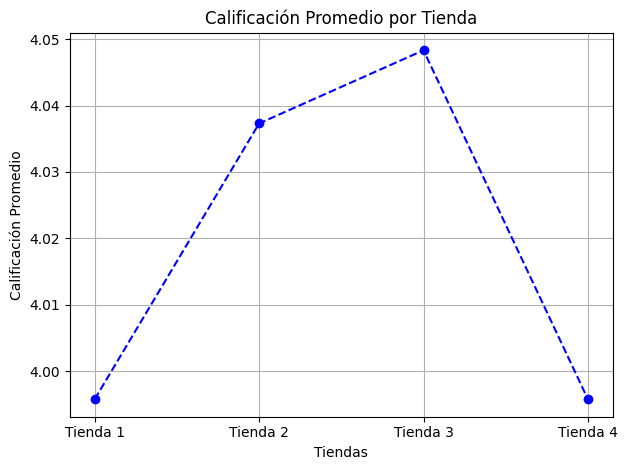

In [25]:
# Generar grafico
plt.plot(tiendas, calificaciones, color="blue", linestyle="--", marker="o")
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')
plt.grid()
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [26]:
# Colocamos los DataFrames en un diccionario
dict_tiendas = {
    'Tienda_1': tienda,
    'Tienda_2': tienda2,
    'Tienda_3': tienda3,
    'Tienda_4': tienda4 }

# Concatenamos usando el argumento 'keys'
df_tiendas = pd.concat(dict_tiendas, keys=dict_tiendas.keys(), names=['Tienda', None]).reset_index(level=0)

In [27]:
# Identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda
tiendas = df_tiendas.groupby(['Tienda', 'Producto'])['Precio'].sum().reset_index()

def top_mas_menos_vendidos(tienda):
  producto_precio = tiendas[tiendas['Tienda'] == tienda]

  top_3_ventas = producto_precio.nlargest(3, 'Precio')
  top_3_menos_ventas = producto_precio.nsmallest(3, 'Precio')

  print(f"\n ------ {tienda} - TOP 3 productos que MÁS dinero generaron:")
  for _, fila in top_3_ventas.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Precio']:.2f}")

  print(f"\n{tienda} - TOP 3 productos que MENOS dinero generaron:")
  for _, fila in top_3_menos_ventas.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Precio']:.2f}")


In [28]:
# Iterar funcion top_mas_menos_vendidos
for tienda in df_tiendas['Tienda'].unique():
  top_mas_menos_vendidos(tienda)


 ------ Tienda_1 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $96697500.00
  TV LED UHD 4K - Ingresos: $90295300.00
  Smart TV - Ingresos: $82790400.00

Tienda_1 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $704800.00
  Cubo mágico 8x8 - Ingresos: $748400.00
  Dinosaurio Rex - Ingresos: $858100.00

 ------ Tienda_2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda_2 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $643600.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cuerda para saltar - Ingresos: $856900.00

 ------ Tienda_3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda_3 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $640400.00
  D

# 5. Envío promedio por tienda

In [29]:
# Calcular el costo de envío promedio para cada tienda
def costo_envio_promedio(tienda):
  df_tienda = df_tiendas[df_tiendas['Tienda'] == tienda]
  costo_promedio = df_tienda['Costo de envío'].mean()
  print(f"Consto de envio promedio de {tienda}: ${costo_promedio:.2f} ")

In [30]:
# Iterara funcion costo_envio_promedio
for tienda in df_tiendas['Tienda'].unique():
  costo_envio_promedio(tienda)

Consto de envio promedio de Tienda_1: $23459.46 
Consto de envio promedio de Tienda_2: $25216.24 
Consto de envio promedio de Tienda_3: $24805.68 
Consto de envio promedio de Tienda_4: $23459.46 


# Informe Final


## Informe de Análisis

**Objetivo**: Identificar la tienda menos rentable para su posible venta

### 1. Resumen
  * El analisis consite en descubrir el desempelo de cada tienda
  * Se evaluaran las siguientes consideraciones para cada tienda:
      * Facturacion total por tienda
      * Ventas por categoria
      * Calificación promedio
      * Productos más y menos vendidos
      * Costo de envio promedio
  * La Tienda 4 muestra consistentemente el menor desempeño en ingresos y el segundo en calificación , lo que la posiciona como candidata para ser vendida

### 2. Conclusión y Recomendación

Aunque todas las tiendas generan un nivel alto de ingresos, la Tienda 4 presenta el desempeño más bajo tanto en facturación (23.6% del total), como en satisfacción del clientes. Con base en el análisis, recomendamos considerar la venta de la Tienda 4.

